In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import os
import cv2
import random

In [6]:
def readTrafficSigns(rootpath, IMG_SIZE):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training' and image size
    Returns:   trainingdata'''
    training_data = []


    gtFile = open(rootpath + 'GT-final_test.csv') # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    k = 0
    # loop over all images in current annotations file
    for row in gtReader:
        if k == 0:
            pass
        else:
            training_data.append([cv2.resize(plt.imread(rootpath + row[0]), (IMG_SIZE,IMG_SIZE)),int(row[7])])
        k += 1
    gtFile.close()
    
    return training_data

In [7]:
IMG_SIZE = 32
training_data = readTrafficSigns('GTSRB/Final_Test/Images/', IMG_SIZE)
random.shuffle(training_data)

In [8]:
X = []
labels = []

for features, label in training_data:
    X.append(features)
    labels.append(label)
    
X = np.reshape(X, (-1, IMG_SIZE, IMG_SIZE, 3))


(12630, 32, 32, 3)


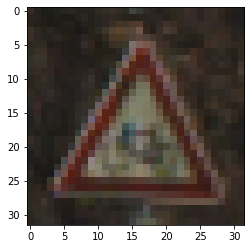

In [9]:
print(X.shape)
plt.imshow(X[900])

In [10]:
def label_trafo(labels, num_labels):
    new_labels = []
    for label in labels:
        tmp = np.zeros((num_labels))
        tmp[int(label)] = 1
        new_labels.append(tmp)
    return new_labels

In [11]:
np.save("test_features", X)
np.save("test_labels_SVM", labels)

y = label_trafo(labels, 43)
print(y[0:3])
print(labels[0:3])

[array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])]
[7, 10, 8]


In [12]:
np.save("test_features", X)
np.save("test_labels", y)

